In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
conn = pymysql.connect(host = '166.104.80.140',
                       port = 3309,
                       user = 'root',
                       password = 'ys3110hs!!',
                       db = 'test_db1')

In [3]:
sql_input = "SELECT * FROM protein2"
value = pd.read_sql_query(sql_input, conn)
#revise_value=value.iloc[:50000]
value['Time'] = pd.to_datetime(value['stamp'], unit='ms')
value = value.set_index(value['Time'])
value = value.drop(['stamp'], axis = 1)
value

,Sensor,Value,Time
Time,,,
2024-02-26 06:03:02,,inf,2024-02-26 06:03:02
2024-02-26 06:03:02,MQ5,inf,2024-02-26 06:03:02
2024-02-26 06:03:04,MQ6,inf,2024-02-26 06:03:04
2024-02-26 06:03:05,MQ7,inf,2024-02-26 06:03:05
2024-02-26 06:03:06,MQ8,inf,2024-02-26 06:03:06
...,...,...,...
2024-02-26 06:33:20,TGS2620,0.915153563,2024-02-26 06:33:20
2024-02-26 06:33:20,TGS2603,0.385356456,2024-02-26 06:33:20
2024-02-26 06:33:21,TGS2610,0.483437777,2024-02-26 06:33:21


In [4]:
value_drop=['MQ5','MQ6','','MQ7','MQ8','MQ9','MQ10','MQ11','MQ12']
value2=value.drop(value[value['Sensor'].isin(value_drop)].index)
value2

,Sensor,Value,Time
Time,,,
2024-02-26 06:03:07,TGS2602,0.961795330,2024-02-26 06:03:07
2024-02-26 06:03:07,TGS2612,0.961891770,2024-02-26 06:03:07
2024-02-26 06:03:10,TGS2610,0.483437777,2024-02-26 06:03:10
2024-02-26 06:03:10,TGS2611,0.492700726,2024-02-26 06:03:10
2024-02-26 06:03:16,TGS2600,0.954063654,2024-02-26 06:03:16
...,...,...,...
2024-02-26 06:33:17,TGS2602,0.901683092,2024-02-26 06:33:17
2024-02-26 06:33:17,TGS2612,0.901773512,2024-02-26 06:33:17
2024-02-26 06:33:20,TGS2620,0.915153563,2024-02-26 06:33:20


In [5]:
sensor_dict = {}
for sensor, group in value2.groupby('Sensor'):
    sensor_dict[sensor] = group.drop(columns=['Sensor'])
sensor_dict

{'TGS2600':                            Value                Time
 Time                                                
 2024-02-26 06:03:16  0.954063654 2024-02-26 06:03:16
 2024-02-26 06:03:24  1.164077640 2024-02-26 06:03:24
 2024-02-26 06:03:32  1.200080037 2024-02-26 06:03:32
 2024-02-26 06:03:55  1.092072845 2024-02-26 06:03:55
 2024-02-26 06:04:23  0.990066051 2024-02-26 06:04:23
 ...                          ...                 ...
 2024-02-26 06:30:49  0.900060058 2024-02-26 06:30:49
 2024-02-26 06:31:04  0.894059658 2024-02-26 06:31:04
 2024-02-26 06:31:14  0.894059658 2024-02-26 06:31:14
 2024-02-26 06:31:40  0.894059658 2024-02-26 06:31:40
 2024-02-26 06:31:56  0.894059658 2024-02-26 06:31:56
 
 [72 rows x 2 columns],
 'TGS2602':                            Value                Time
 Time                                                
 2024-02-26 06:03:07  0.961795330 2024-02-26 06:03:07
 2024-02-26 06:03:16  0.955784082 2024-02-26 06:03:16
 2024-02-26 06:03:24  1.178199291 

In [6]:
Title = ['TGS2600','TGS2602','TGS2603','TGS2610','TGS2611','TGS2612','TGS2620']

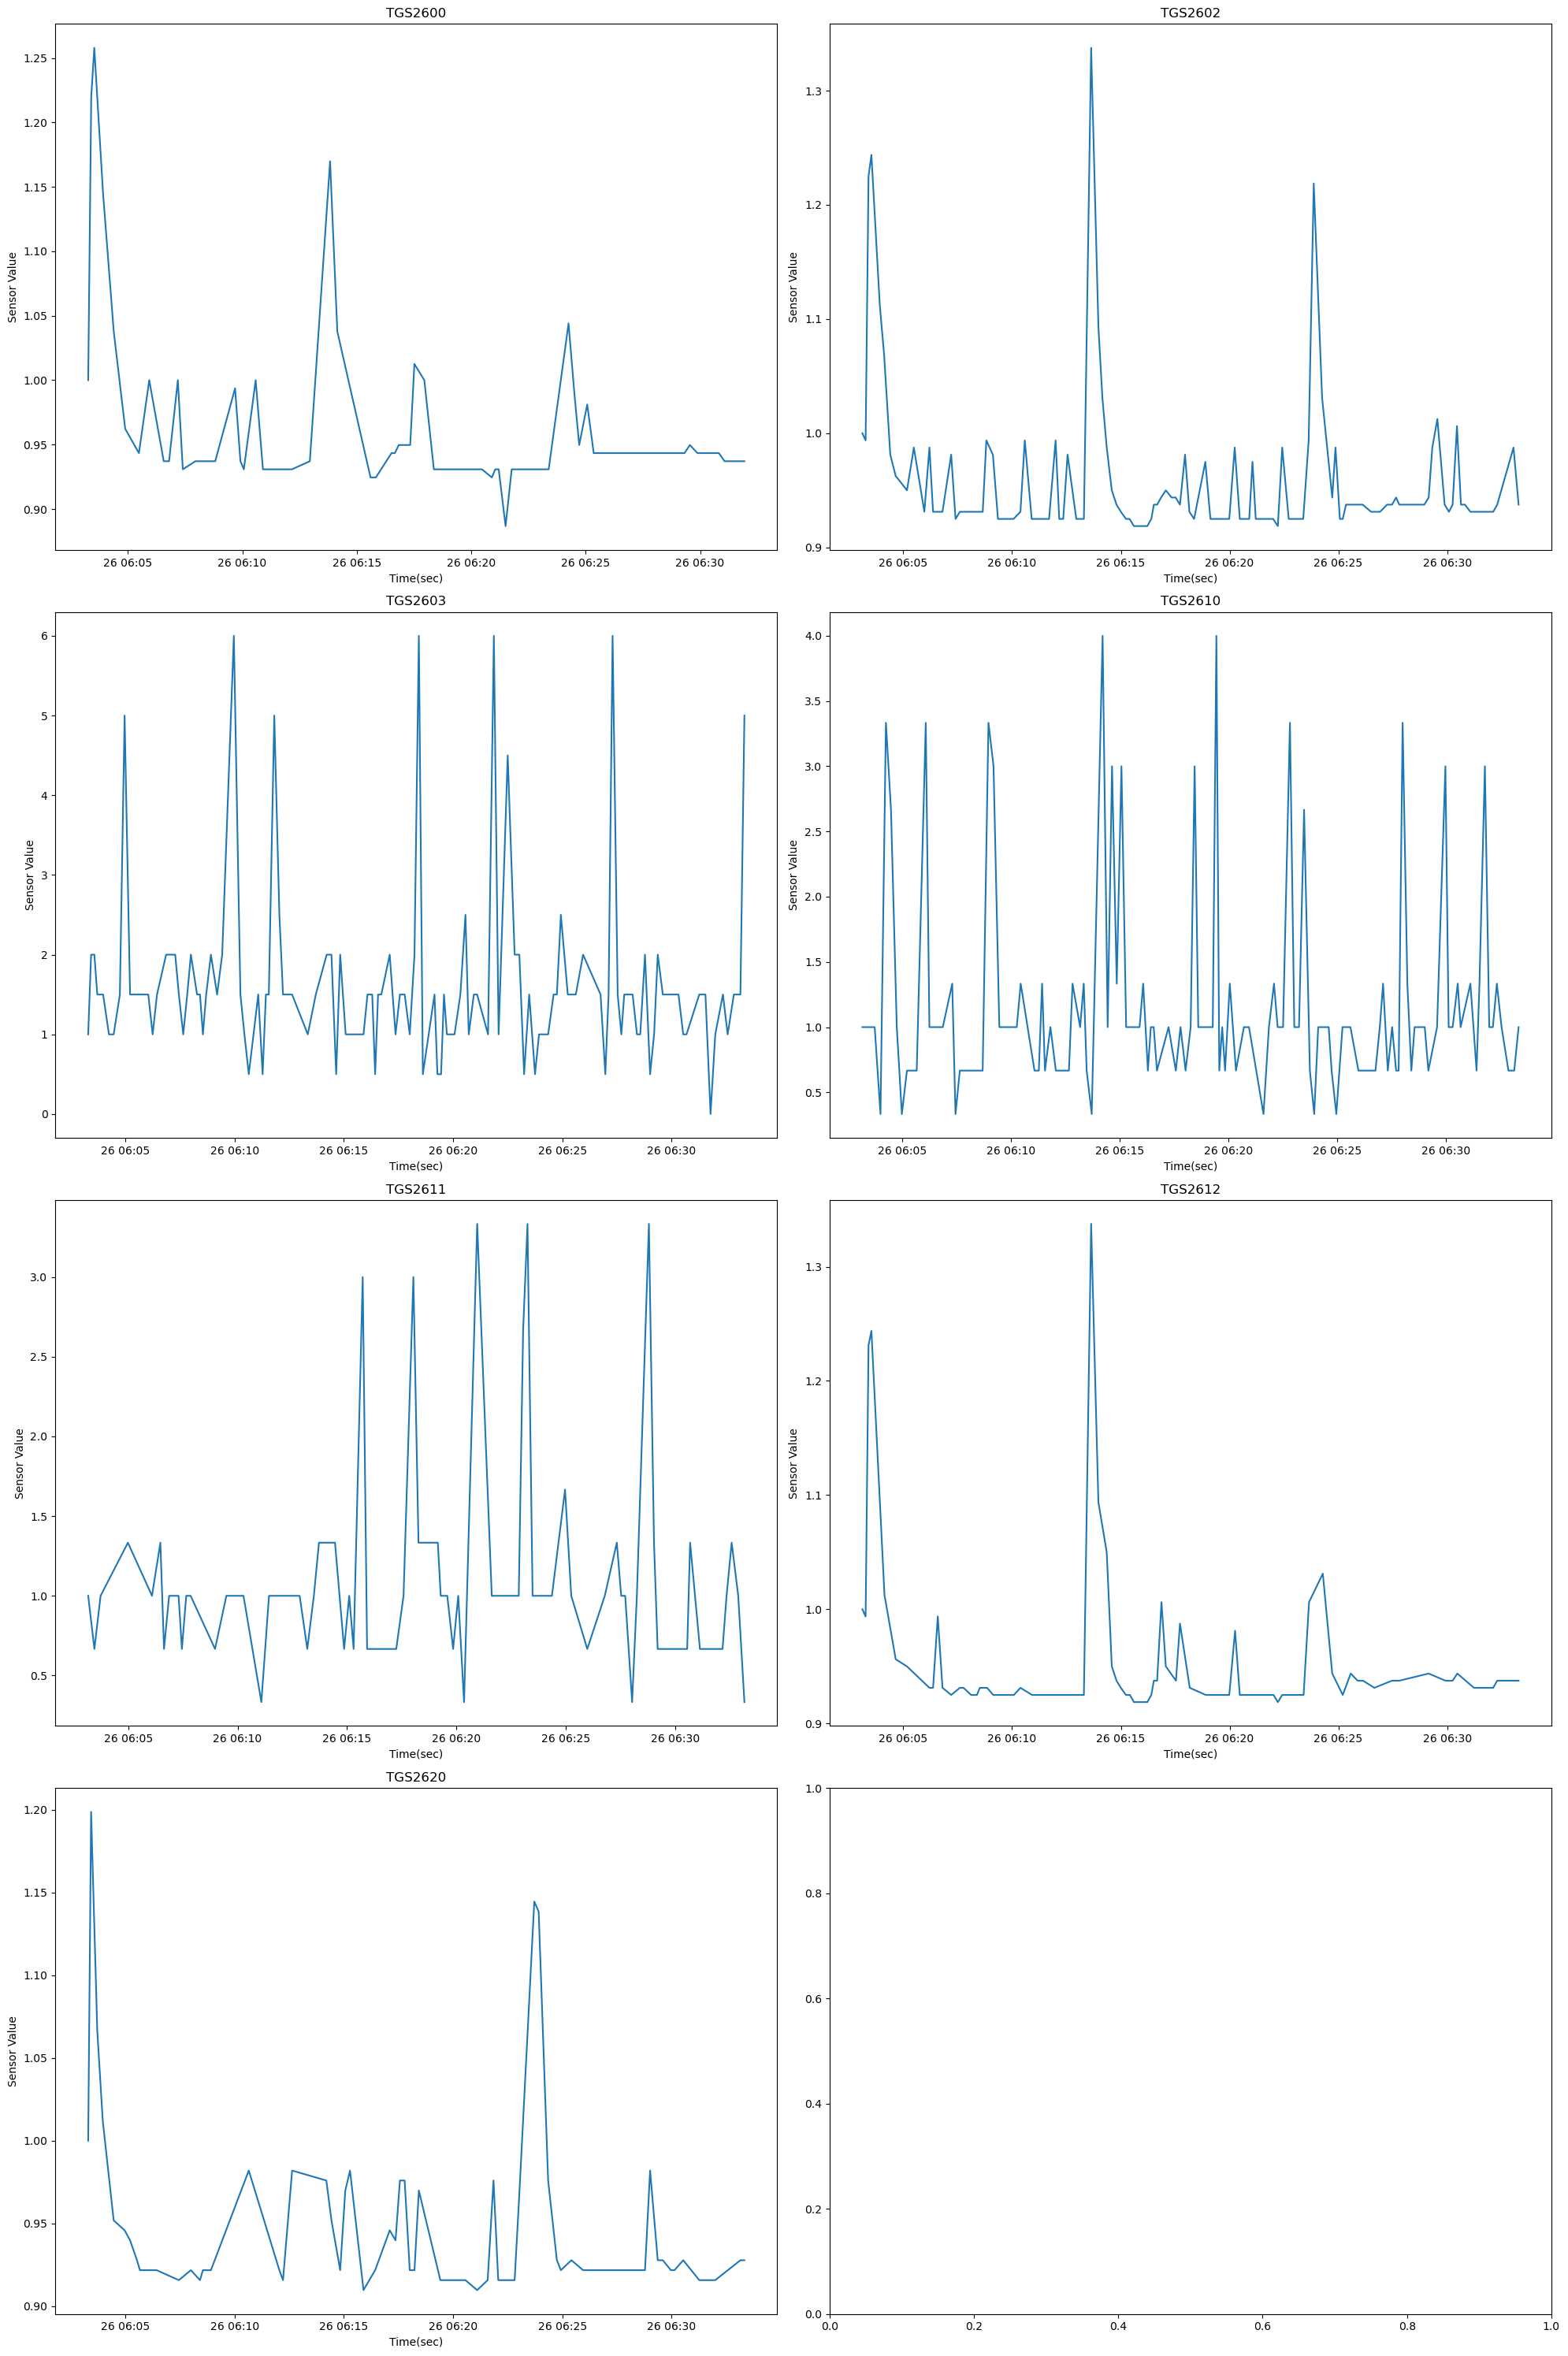

In [7]:
fig, axes = plt.subplots(nrows=len(sensor_dict)//2+1, ncols = 2, figsize=(20,30))
axes = axes.flatten()

for i, (sensor, data) in enumerate(sensor_dict.items()):
    data['Value'] = data['Value'].apply(pd.to_numeric)
    if data['Value'].iloc[0]!=0:
        data['Value'] = data['Value']/ data['Value'].iloc[0]
    ax = axes[i]
    ax.plot(data['Time'],data['Value'])
    ax.set_title(Title[i])
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Sensor Value')
    #ax.set_xlim([-0.1,3500])
plt.tight_layout()